In [54]:
"""
Necessary Comment : jupyter notebook
"""

'\nNecessary Comment : jupyter notebook\n'

In [55]:
"""
Necessary Lighbary
"""
import sqlite3
import pandas as pd
import talib
import mplfinance as mpf
import numpy as np

In [56]:
"""
Database Connection
"""
connection = sqlite3.connect(r"cripto.db")
cur = connection.cursor()
database_data = cur.execute("select * from asset order by CloseTime").fetchall()

In [57]:
"""
Dataframe
"""
df = pd.DataFrame(database_data)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,BTCBUSD,16617.48,16622.19,16616.02,16621.68,33.78673,0.0252745903711076,1669440299999,664.0,22.26316,1.669440e+09
1,2,BTCBUSD,16621.97,16624.08,16620.13,16621.09,29.60535,-0.00529419798014928,1669440359999,579.0,13.33170,1.669440e+09
2,3,BTCBUSD,16621.54,16625.95,16619.30,16621.87,49.48804,0.00198537560297125,1669440419999,1070.0,24.97511,1.669440e+09
3,4,BTCBUSD,16621.96,16628.06,16620.83,16625.72,44.92542,0.0226206777058905,1669440479999,715.0,27.98584,1.669440e+09
4,5,BTCBUSD,16625.90,16630.99,16624.81,16630.26,42.83208,0.0262241442568339,1669440539999,760.0,22.47060,1.669440e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
1865,1866,BTCBUSD,16546.34,16547.15,16544.53,16545.62,17.92519,-0.00435141547920062,1669555199999,434.0,8.00625,1.669555e+09
1866,1867,BTCBUSD,16545.95,16547.50,16543.73,16545.65,45.65405,-0.00181313251882952,1669555259999,670.0,19.64967,1.669555e+09
1867,1868,BTCBUSD,16545.65,16551.01,16545.43,16549.39,52.58485,0.0226041285775897,1669555319999,790.0,30.56801,1.669555e+09
1868,1869,BTCBUSD,16549.50,16551.00,16548.30,16551.00,35.59966,0.0090637179370978,1669555379999,578.0,17.61941,1.669555e+09


In [58]:
"""
Name Columns
"""
df.columns = ['Id', 'Symbol', 'Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime', 'Trades', 'BuyQuoteVolume', 'Time']
# df = df.iloc[:, 2:12]
df


,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,CloseTime,Trades,BuyQuoteVolume,Time
0,1,BTCBUSD,16617.48,16622.19,16616.02,16621.68,33.78673,0.0252745903711076,1669440299999,664.0,22.26316,1.669440e+09
1,2,BTCBUSD,16621.97,16624.08,16620.13,16621.09,29.60535,-0.00529419798014928,1669440359999,579.0,13.33170,1.669440e+09
2,3,BTCBUSD,16621.54,16625.95,16619.30,16621.87,49.48804,0.00198537560297125,1669440419999,1070.0,24.97511,1.669440e+09
3,4,BTCBUSD,16621.96,16628.06,16620.83,16625.72,44.92542,0.0226206777058905,1669440479999,715.0,27.98584,1.669440e+09
4,5,BTCBUSD,16625.90,16630.99,16624.81,16630.26,42.83208,0.0262241442568339,1669440539999,760.0,22.47060,1.669440e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
1865,1866,BTCBUSD,16546.34,16547.15,16544.53,16545.62,17.92519,-0.00435141547920062,1669555199999,434.0,8.00625,1.669555e+09
1866,1867,BTCBUSD,16545.95,16547.50,16543.73,16545.65,45.65405,-0.00181313251882952,1669555259999,670.0,19.64967,1.669555e+09
1867,1868,BTCBUSD,16545.65,16551.01,16545.43,16549.39,52.58485,0.0226041285775897,1669555319999,790.0,30.56801,1.669555e+09
1868,1869,BTCBUSD,16549.50,16551.00,16548.30,16551.00,35.59966,0.0090637179370978,1669555379999,578.0,17.61941,1.669555e+09


In [59]:
# """
# Candle Data Column
# """
# df_candle = df[['CloseTime', 'Open', 'High', 'Low', 'Close', 'VolumeBTC']]
# df_candle

In [60]:
# """
# Time Indexing
# """
# df_candle = df.set_index('CloseTime')
# df_candle.index = pd.to_datetime(df.index, unit='ms')

In [61]:
# mpf.plot(
#     df_candle.tail(5),
# #     df,
#     mav=[7, 25 , 90],
#     type="candle",
# #     type="renko",
#     title=f"BTC BUSD Price Candle",
#     style="yahoo",
# )

In [62]:
df = df.set_index('CloseTime')
df.index = pd.to_datetime(df.index, unit='ms')
# df = df.tail(100)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,Trades,BuyQuoteVolume,Time
CloseTime,,,,,,,,,,,
2022-11-26 05:24:59.999,1,BTCBUSD,16617.48,16622.19,16616.02,16621.68,33.78673,0.0252745903711076,664.0,22.26316,1.669440e+09
2022-11-26 05:25:59.999,2,BTCBUSD,16621.97,16624.08,16620.13,16621.09,29.60535,-0.00529419798014928,579.0,13.33170,1.669440e+09
2022-11-26 05:26:59.999,3,BTCBUSD,16621.54,16625.95,16619.30,16621.87,49.48804,0.00198537560297125,1070.0,24.97511,1.669440e+09
2022-11-26 05:27:59.999,4,BTCBUSD,16621.96,16628.06,16620.83,16625.72,44.92542,0.0226206777058905,715.0,27.98584,1.669440e+09
2022-11-26 05:28:59.999,5,BTCBUSD,16625.90,16630.99,16624.81,16630.26,42.83208,0.0262241442568339,760.0,22.47060,1.669440e+09
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-27 13:19:59.999,1866,BTCBUSD,16546.34,16547.15,16544.53,16545.62,17.92519,-0.00435141547920062,434.0,8.00625,1.669555e+09
2022-11-27 13:20:59.999,1867,BTCBUSD,16545.95,16547.50,16543.73,16545.65,45.65405,-0.00181313251882952,670.0,19.64967,1.669555e+09
2022-11-27 13:21:59.999,1868,BTCBUSD,16545.65,16551.01,16545.43,16549.39,52.58485,0.0226041285775897,790.0,30.56801,1.669555e+09


In [63]:
# # TODO: ALL all 100 and -100 to the X asis
# # Find Candle Pattern
# ENGULFING = talib.CDLENGULFING(df['Open'], df['High'], df['Low'],
#                                          df['Close'])
# # ENGULFING
# ENGULFING[ENGULFING != 0]

In [64]:
# bullish_engulfing = (ENGULFING.replace([-100, 0], np.nan)/100) *(df.Low-2)
# bearsh_engulfing = (-ENGULFING.replace([100, 0], np.nan)/100) *(df.High *1.0001)

In [65]:
# addplot = [mpf.make_addplot(bullish_engulfing, type='scatter', color='g', marker = "^"), mpf.make_addplot(bearsh_engulfing, type='scatter', color='r', marker = "v")]
# mpf.plot(df, addplot = addplot,title=f"Engulfing Signal", type="candle",style="yahoo")

In [66]:
# dir(talib)

In [67]:
df = df.head(100)
print(df)

                          Id   Symbol      Open      High       Low     Close  \
CloseTime                                                                       
2022-11-26 05:24:59.999    1  BTCBUSD  16617.48  16622.19  16616.02  16621.68   
2022-11-26 05:25:59.999    2  BTCBUSD  16621.97  16624.08  16620.13  16621.09   
2022-11-26 05:26:59.999    3  BTCBUSD  16621.54  16625.95  16619.30  16621.87   
2022-11-26 05:27:59.999    4  BTCBUSD  16621.96  16628.06  16620.83  16625.72   
2022-11-26 05:28:59.999    5  BTCBUSD  16625.90  16630.99  16624.81  16630.26   
...                      ...      ...       ...       ...       ...       ...   
2022-11-26 06:59:59.999   96  BTCBUSD  16547.61  16553.82  16543.32  16547.91   
2022-11-26 07:00:59.999   97  BTCBUSD  16547.92  16552.46  16544.42  16547.69   
2022-11-26 07:01:59.999   98  BTCBUSD  16548.00  16555.20  16546.76  16553.20   
2022-11-26 07:02:59.999   99  BTCBUSD  16552.14  16559.36  16550.63  16558.00   
2022-11-26 07:03:59.999  100

In [68]:
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
print(results)
print(cols)    

[CloseTime
2022-11-26 05:24:59.999    0
2022-11-26 05:25:59.999    0
2022-11-26 05:26:59.999    0
2022-11-26 05:27:59.999    0
2022-11-26 05:28:59.999    0
                          ..
2022-11-26 06:59:59.999    0
2022-11-26 07:00:59.999    0
2022-11-26 07:01:59.999    0
2022-11-26 07:02:59.999    0
2022-11-26 07:03:59.999    0
Length: 100, dtype: int32, CloseTime
2022-11-26 05:24:59.999    0
2022-11-26 05:25:59.999    0
2022-11-26 05:26:59.999    0
2022-11-26 05:27:59.999    0
2022-11-26 05:28:59.999    0
                          ..
2022-11-26 06:59:59.999    0
2022-11-26 07:00:59.999    0
2022-11-26 07:01:59.999    0
2022-11-26 07:02:59.999    0
2022-11-26 07:03:59.999    0
Length: 100, dtype: int32, CloseTime
2022-11-26 05:24:59.999    0
2022-11-26 05:25:59.999    0
2022-11-26 05:26:59.999    0
2022-11-26 05:27:59.999    0
2022-11-26 05:28:59.999    0
                          ..
2022-11-26 06:59:59.999    0
2022-11-26 07:00:59.999    0
2022-11-26 07:01:59.999    0
2022-11-26 07:02

In [69]:
patterns = pd.DataFrame(results).T
patterns.columns = cols
print(patterns)

                         CDL2CROWS  CDL3BLACKCROWS  CDL3INSIDE  \
CloseTime                                                        
2022-11-26 05:24:59.999          0               0           0   
2022-11-26 05:25:59.999          0               0           0   
2022-11-26 05:26:59.999          0               0           0   
2022-11-26 05:27:59.999          0               0           0   
2022-11-26 05:28:59.999          0               0           0   
...                            ...             ...         ...   
2022-11-26 06:59:59.999          0               0           0   
2022-11-26 07:00:59.999          0               0           0   
2022-11-26 07:01:59.999          0               0           0   
2022-11-26 07:02:59.999          0               0           0   
2022-11-26 07:03:59.999          0               0           0   

                         CDL3LINESTRIKE  CDL3OUTSIDE  CDL3STARSINSOUTH  \
CloseTime                                                          

CloseTime
2022-11-26 05:24:59.999      0
2022-11-26 05:25:59.999      0
2022-11-26 05:26:59.999      0
2022-11-26 05:27:59.999      0
2022-11-26 05:28:59.999      0
                          ... 
2022-11-26 06:59:59.999    300
2022-11-26 07:00:59.999    100
2022-11-26 07:01:59.999      0
2022-11-26 07:02:59.999    100
2022-11-26 07:03:59.999      0
Length: 100, dtype: int64


<AxesSubplot: xlabel='CloseTime'>

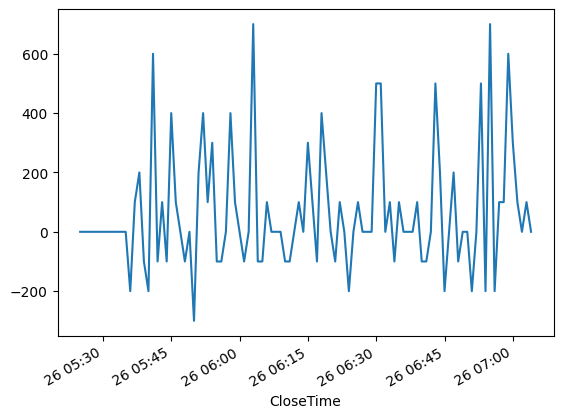

In [70]:
all_pats = patterns.sum(axis=1)
print(all_pats)
all_pats.plot()


In [81]:
df1=pd.DataFrame(all_pats)
df3=df.iloc[:,7]
print(df3)

#print(df1)
#print(df3)
#frames = [df1, df3]

result = pd.concat([df1, df3])



print(result)

print(df1)
array = df1.values
array2 = [];

for x in range(0,len(array)):
    for y in array[x]: 
        if  y>=200:
            array2.append(1)
       
        elif y<=-200 :
            array2.append(1)
        else:
            array2.append(0)
df2=pd.DataFrame(array2).astype("int")
print(df2)



CloseTime
2022-11-26 05:24:59.999       0.0252745903711076
2022-11-26 05:25:59.999     -0.00529419798014928
2022-11-26 05:26:59.999      0.00198537560297125
2022-11-26 05:27:59.999       0.0226206777058905
2022-11-26 05:28:59.999       0.0262241442568339
                                   ...          
2022-11-26 06:59:59.999      0.00181295063153696
2022-11-26 07:00:59.999     -0.00138990277931948
2022-11-26 07:01:59.999       0.0314237370074978
2022-11-26 07:02:59.999       0.0354032771593316
2022-11-26 07:03:59.999    -0.000664322614390811
Name: Change, Length: 100, dtype: object
                                             0
CloseTime                                     
2022-11-26 05:24:59.999                      0
2022-11-26 05:25:59.999                      0
2022-11-26 05:26:59.999                      0
2022-11-26 05:27:59.999                      0
2022-11-26 05:28:59.999                      0
...                                        ...
2022-11-26 06:59:59.999    0.00181

In [72]:
"""
X value for DecisionTreeClassifier

X = df.drop(columns=['Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime', 'BuyQuoteVolume', 'Time'])
X

X= df.drop(columns=['Id','Symbol','Time'])
print(X)
"""


X=df1
y=df2
print(X)


                           0
CloseTime                   
2022-11-26 05:24:59.999    0
2022-11-26 05:25:59.999    0
2022-11-26 05:26:59.999    0
2022-11-26 05:27:59.999    0
2022-11-26 05:28:59.999    0
...                      ...
2022-11-26 06:59:59.999  300
2022-11-26 07:00:59.999  100
2022-11-26 07:01:59.999    0
2022-11-26 07:02:59.999  100
2022-11-26 07:03:59.999    0

[100 rows x 1 columns]


In [73]:
"""
y value for DecisionTreeClassifier

"""




'\ny value for DecisionTreeClassifier\n\n'

In [74]:
"""
Model for AI Research
"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier()
#model=RandomForestClassifier()
model

DecisionTreeClassifier()

In [75]:
model.fit(X, y)

DecisionTreeClassifier()

In [78]:
# model.predict([  [40, 0],[60, 1] ])

print(model.predict([ [300] ]))

[1]
